# Kolektor Surface Defect Detection
TMM4128 - Machine Learning for Engineers - Semestral Project


### Import TensorFlow

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [93]:
import tensorflow as tf
# CUDA check
print("Number of GPUs: ", len(tf.config.list_physical_devices('GPU')))

Number of GPUs:  1


In [94]:
Categories = ["Undamaged", "Damaged"]
data_train = "./datasets/KolektorSDD2/train/"
data_test = "./datasets/KolektorSDD2/test/"
current_directory = os.getcwd()
print(current_directory)

flat_train = []
flat_train_GT = []
flat_test = []
flat_test_GT = []
damage_label_train = []
damage_label_test = []
img_name = []
X_train = []
X_test = []
y_train = []
y_test = []

c:\Users\lukasvi\Documents\GitHub\NTNU-ML-KolektorSDD2


In [95]:
#Create path to folder
path = data_train

rot = 0

#For-loop to go through all the contents in the folder
for img in os.listdir(path):
    #Distinguishing between Groundtruth pictures and Actual pictures
    
    
    if "GT" in img:
        img_array = cv2.imread(os.path.join(path,img))
        flat_train_GT.append(img_array.flatten())
        #If the GT Image is Black, no damage is detected
        if np.all(img_array == 0):
            y_train.append(0)
        else:
            y_train.append(1)
            y_train.append(1)
            rot = 1
        #Mark GT images, if any defect is on them
    elif "GT" not in img:
        img2 = load_img(os.path.join(path,img), target_size = (636, 231)) # load image and resize
        img_array = img_to_array(img2) # convert image to array
        img_array /= 255.0 # normalizing to scale from 0 to 1
        X_train.append(img_array)
        #if(rot)
#img2.show()
#print(y_train)

#for img_rot in 

In [96]:
#Create path to folder
path = data_test

#For-loop to go through all the contents in the folder
for img in os.listdir(path):
    #Distinguishing between Groundtruth pictures and Actual pictures
    
    if "GT" in img:
        img_array = cv2.imread(os.path.join(path,img))
        flat_test_GT.append(img_array.flatten())
        #If the GT Image is Black, no damage is detected
        if np.all(img_array == 0):
            y_test.append(0)
        else:
            y_test.append(1)
        #Mark GT images, if any defect is on them
    elif "GT" not in img:
        img2 = load_img(os.path.join(path,img), target_size = (636, 231)) # load image and resize
        img_array = img_to_array(img2) # convert image to array
        img_array /= 255.0 # normalizing to scale from 0 to 1
        X_test.append(img_array)
#img2.show()
#print(y_train)

In [97]:
X_train = np.array(X_train)
X_test = np.array(X_test) # Empty
y_train = np.array(y_train)
y_test = np.array(y_test)  # Empty
print(X_train.shape)
print(X_test.shape)

(2332, 636, 231, 3)
(1004, 636, 231, 3)


In [77]:
#df_train = pd.DataFrame(flat_train)
#df_train["Damage"] = damage_label_train

#df_test = pd.DataFrame(flat_test)
#df_test["Damage"] = damage_label_test

In [78]:
#X_train = df_train.iloc[:, :-1]
#y_train = df_train.iloc[:, -1] 

#X_test = df_test.iloc[:, -1] 
#y_test = df_test.iloc[:, -1] 

In [79]:
print(X_train)

[[[[0.10980392 0.09411765 0.12156863]
   [0.0627451  0.07058824 0.07450981]
   [0.07058824 0.07843138 0.07843138]
   ...
   [0.1764706  0.1764706  0.16470589]
   [0.1764706  0.16078432 0.15294118]
   [0.18039216 0.17254902 0.17254902]]

  [[0.07450981 0.07843138 0.09019608]
   [0.07450981 0.07843138 0.08627451]
   [0.09019608 0.09411765 0.09803922]
   ...
   [0.18431373 0.17254902 0.18039216]
   [0.16470589 0.15294118 0.14901961]
   [0.16470589 0.16862746 0.16862746]]

  [[0.09411765 0.07450981 0.07450981]
   [0.09803922 0.10980392 0.13333334]
   [0.10980392 0.10588235 0.09803922]
   ...
   [0.15686275 0.15294118 0.16862746]
   [0.13725491 0.13333334 0.14117648]
   [0.17254902 0.16862746 0.16470589]]

  ...

  [[0.09019608 0.11764706 0.13725491]
   [0.12156863 0.10588235 0.12941177]
   [0.09803922 0.09803922 0.12941177]
   ...
   [0.25882354 0.2901961  0.29411766]
   [0.2        0.21960784 0.24705882]
   [0.13725491 0.17254902 0.2       ]]

  [[0.09019608 0.11372549 0.14901961]
   [0.1

In [80]:
# Reshape
# X_train = X_train.reshape(-1, 636, 231, 3) # -1 means it keeps the same length
# X_test = X_test.reshape(-1, 636, 231, 3) # Empty !
# print("x_train shape: ", X_train.shape)
# print("X_test shape: ", X_test.shape)
# print("y_train shape: ",y_train.shape)

In [81]:
# Train - Test split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=4)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

x_train shape (1632, 636, 231, 3)
x_val shape (700, 636, 231, 3)
y_train shape (1632,)
y_val shape (700,)


In [82]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (636,231,3)))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (636,231,3)))
model.add(MaxPool2D(pool_size=(2,2)))


# fully connected
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [83]:
# Define the optimizer
# In neural networks, an optimizer is an algorithm used to adjust the weights and biases 
# of the network during training in order to minimize the loss function and improve the accuracy of the model.

optimizer = Adam(learning_rate=0.001) # , beta_1=0.9, beta_2=0.999

In [84]:
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

In [85]:
epochs = 100  
batch_size = 250

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)

In [87]:
# Lets fit the model

history = model.fit(X_train, y_train,
                              epochs = epochs, validation_data = (X_val, y_val), steps_per_epoch=X_train.shape[0] // batch_size) # , callbacks=[early_stopping]

Epoch 1/100
6/6 [==============================] - 13s 1s/step - loss: 0.8683 - accuracy: 0.7188 - val_loss: 0.2873 - val_accuracy: 0.9171
Epoch 2/100
6/6 [==============================] - 5s 781ms/step - loss: 0.3839 - accuracy: 0.8842 - val_loss: 0.2897 - val_accuracy: 0.9171
Epoch 3/100
6/6 [==============================] - 4s 773ms/step - loss: 0.3719 - accuracy: 0.8842 - val_loss: 0.2860 - val_accuracy: 0.9171
Epoch 4/100
6/6 [==============================] - 4s 769ms/step - loss: 0.3754 - accuracy: 0.8842 - val_loss: 0.2834 - val_accuracy: 0.9171
Epoch 5/100
6/6 [==============================] - 4s 771ms/step - loss: 0.3634 - accuracy: 0.8842 - val_loss: 0.3011 - val_accuracy: 0.9171
Epoch 6/100
6/6 [==============================] - 4s 768ms/step - loss: 0.3728 - accuracy: 0.8842 - val_loss: 0.2876 - val_accuracy: 0.9171
Epoch 7/100
6/6 [==============================] - 4s 769ms/step - loss: 0.3545 - accuracy: 0.8842 - val_loss: 0.3052 - val_accuracy: 0.9171
Epoch 8/100
6/6

In [88]:
print("Accuracy of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[0])

3/3 [==============================] - 3s 768ms/step - loss: 1.3755 - accuracy: 0.9071
Accuracy of the model is -->  90.71428775787354 %
3/3 [==============================] - 1s 203ms/step - loss: 1.3755 - accuracy: 0.9071
Loss of the model is -->  1.3755052089691162


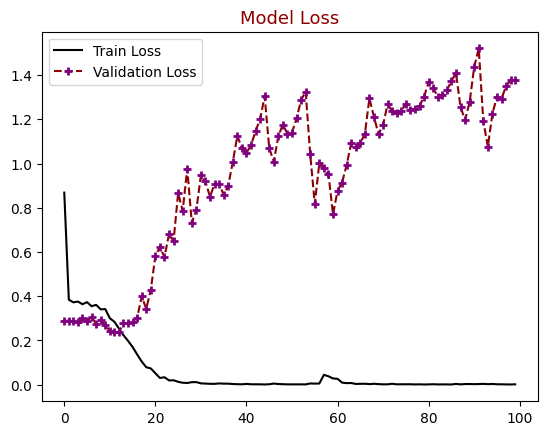

In [89]:
# Model Loss

plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

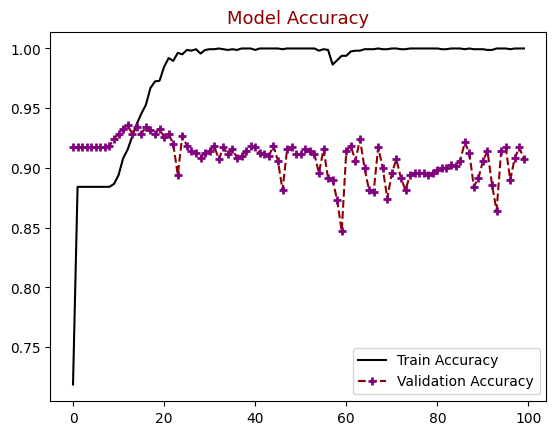

In [90]:
# Model Accuracy 

plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [103]:
Y_predict_test = model.predict(X_test)
print(Y_predict_test)

binary_predictions = (Y_predict_test > 0.5).astype(int)

accuracy = (binary_predictions.flatten() == y_test).mean()
unique, counts = np.unique(y_test, return_counts=True)

print(dict(zip(unique, counts)))
print(894/len(y_test))

print(f"Test accuracy: {accuracy * 100:.2f}%")

32/32 [==============================] - 1s 28ms/step
[[6.6394702e-11]
 [1.3782292e-10]
 [8.0534853e-08]
 ...
 [3.8456980e-07]
 [3.7561924e-12]
 [1.9527388e-12]]
{0: 894, 1: 110}
0.8904382470119522
Test accuracy: 87.95%


22/22 [==============================] - 1s 38ms/step
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0

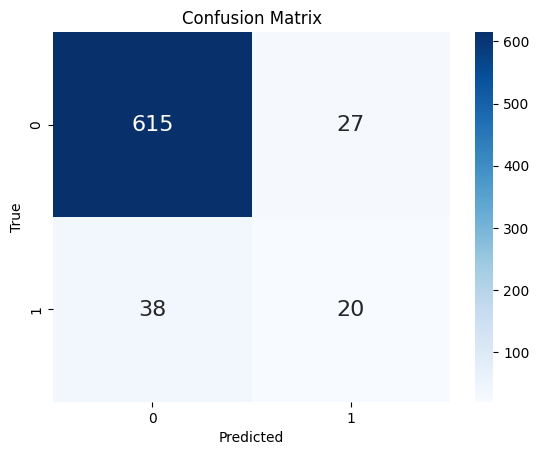

ValueError: Found input variables with inconsistent numbers of samples: [700, 1004]

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have 'test_labels' and 'binary_predictions'
# test_labels: True labels for the test set
# binary_predictions: Predictions made by the model (0 or 1)

Y_pred = model.predict(X_val)
Y_pred_bin_list = []
for val in Y_pred:
    if val > 0.5:
        Y_pred_bin_list.append(1)
    else:
        Y_pred_bin_list.append(0)
Y_pred_bin = np.array(Y_pred_bin_list)
print(Y_pred_bin)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, Y_pred_bin)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
accuracy = accuracy_score(y_val, binary_predictions)
precision = precision_score(y_val, binary_predictions)
recall = recall_score(y_val, binary_predictions)
f1 = f1_score(y_val, binary_predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

32/32 [==============================] - 1s 39ms/step
[0 0 0 ... 0 0 0]


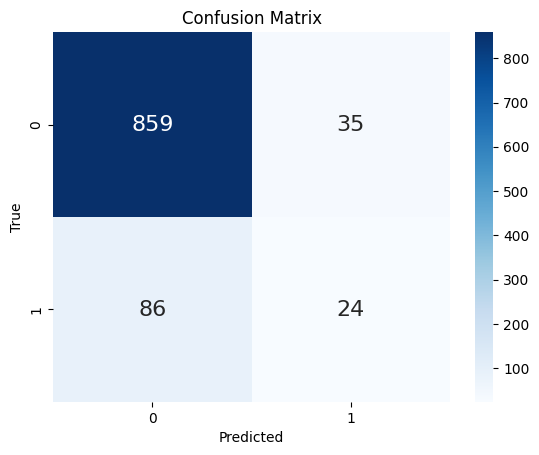

ValueError: Found input variables with inconsistent numbers of samples: [700, 1004]

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have 'test_labels' and 'binary_predictions'
# test_labels: True labels for the test set
# binary_predictions: Predictions made by the model (0 or 1)

Y_pred = model.predict(X_test)
Y_pred_bin_list = []
for val in Y_pred:
    if val > 0.5:
        Y_pred_bin_list.append(1)
    else:
        Y_pred_bin_list.append(0)
Y_pred_bin = np.array(Y_pred_bin_list)
print(Y_pred_bin)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred_bin)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
accuracy = accuracy_score(y_val, binary_predictions)
precision = precision_score(y_val, binary_predictions)
recall = recall_score(y_val, binary_predictions)
f1 = f1_score(y_val, binary_predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [91]:
import matplotlib

# We make predictions using the model we have created.
Y_pred = model.predict(X_val)
# argmax = To briefly mention it, it will give the index of the value with the highest value.
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

# We do the same for the y_val values. because we will compare these values. 
Y_true = np.argmax(y_val, axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(1, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label", color = "blue")
plt.ylabel("True Label", color = "green")
plt.title("Confusion Matrix", color = "darkred", size = 15)
plt.show()

22/22 [==============================] - 1s 31ms/step


AxisError: axis 1 is out of bounds for array of dimension 1